## Prediction using Decision Tree Algorithm

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt

In [25]:
df = pd.read_csv("Iris.csv")

In [26]:
df.drop("Id", axis=1, inplace=True)

In [27]:
classes = df.Species.unique()

In [28]:
df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace=True)

In [29]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


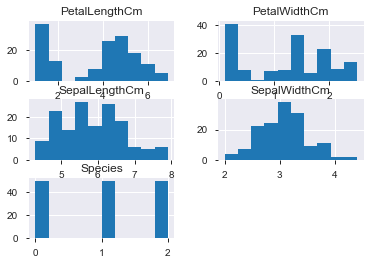

In [30]:
df.hist()
plt.show()

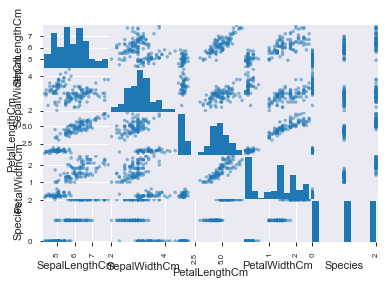

In [31]:
pd.plotting.scatter_matrix(df)
plt.show()

In [40]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("decision_tree.html")

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [41]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [42]:
features = X.columns

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
parameters={"max_depth": [2, 4, 7, 10, None]}

In [46]:
model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 10}

In [47]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

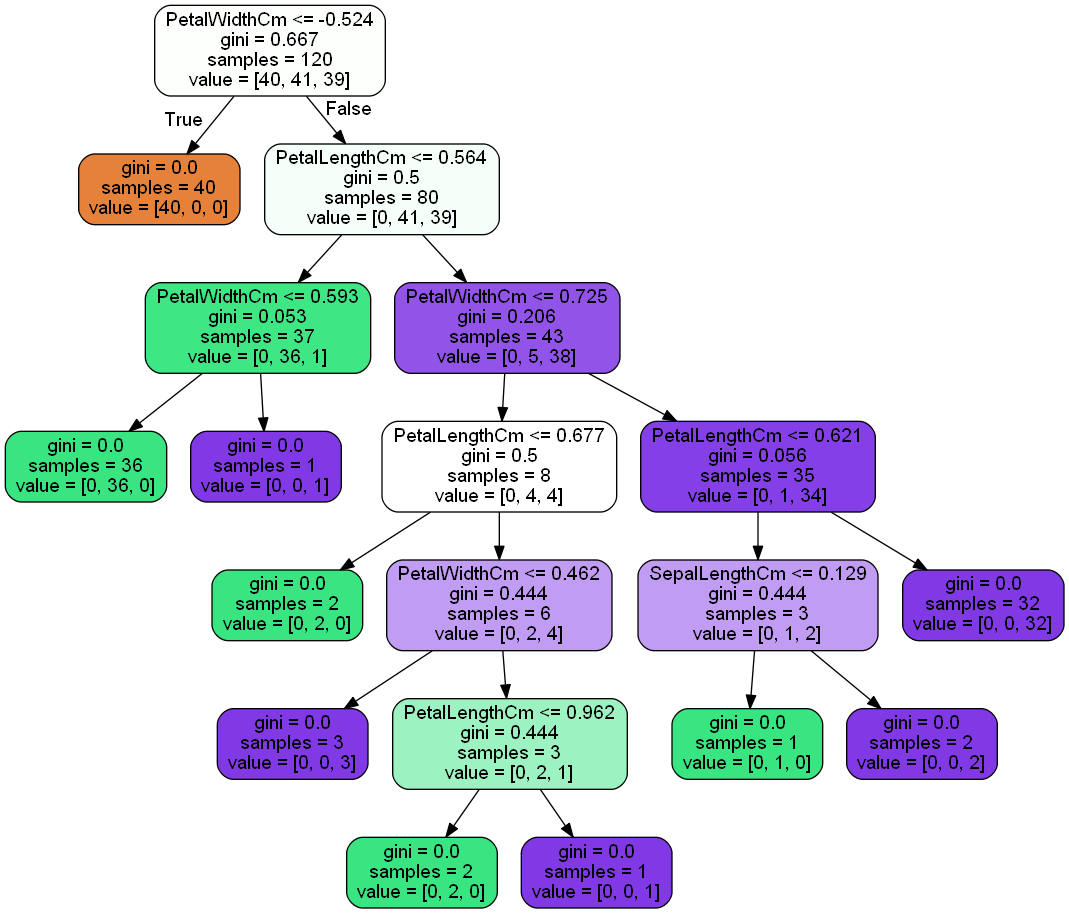

In [48]:
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(model,feature_names = features,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [49]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [50]:
result = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
result

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [51]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy is: ", accuracy)

Accuracy is:  1.0
